# Implementation Analysis

In this notebook I take all implementation results and I analyze the time spent on each stage of the algorithm, the speedup and the scalability.


The dimension of file is fixed. Another study on the performance of program related the dimension of file is available in another notebook.

In [1]:
from b_tools.analysis import compute_performances

In [2]:
# File dimension
FILE_DIM='300'
SEQ_DATA, THR_DATA, FF_DATA = compute_performances(FILE_DIM)

In [3]:
SEQ_DATA

READ         1.955812e+08
FREQCALC     8.580669e+08
HUFFBUILD    3.287200e+04
MAP          3.155695e+09
TRANSFORM    1.751403e+10
WRITE        3.845640e+08
TOTAL        2.207849e+10
dtype: float64

In [4]:
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO,EFF_-IO
0,1,195687830.0,858598880.0,24867.0,5.833470e+09,1.256992e+10,309695983.0,1.980883e+10,1.114578,1.930345e+10,1.113705,1.000000,1.000000,1.114578,1.113705
1,2,177428010.0,428213329.0,41327.0,4.777327e+09,6.492285e+09,306922373.0,1.216547e+10,1.814849,1.168112e+10,1.840435,1.628284,1.652535,0.907424,0.920218
2,3,197856208.0,287711130.0,35457.0,3.975907e+09,4.837144e+09,310428225.0,9.386332e+09,2.352195,8.878047e+09,2.421517,2.110391,2.174290,0.784065,0.807172
3,4,203271156.0,213887439.0,36429.0,4.071328e+09,3.800339e+09,316641825.0,8.663062e+09,2.548578,8.143149e+09,2.640052,2.286586,2.370514,0.637144,0.660013
4,5,177666387.0,173786367.0,34635.0,3.555460e+09,2.836206e+09,322078592.0,7.137933e+09,3.093121,6.638188e+09,3.238586,2.775150,2.907940,0.618624,0.647717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,201476323.0,29065122.0,38622.0,3.290334e+09,5.863042e+08,308280766.0,4.391972e+09,5.027009,3.882215e+09,5.537648,4.510237,4.972277,0.083783,0.092294
60,61,181033893.0,27741103.0,37180.0,2.455910e+09,5.869283e+08,309245100.0,3.578737e+09,6.169351,3.088458e+09,6.960865,5.535147,6.250190,0.101137,0.114113
61,62,202264878.0,29422770.0,37510.0,3.284353e+09,5.661387e+08,307389706.0,4.408440e+09,5.008231,3.898786e+09,5.514112,4.493388,4.951144,0.080778,0.088937
62,63,202538839.0,28680501.0,38191.0,3.275236e+09,6.082057e+08,308818589.0,4.424227e+09,4.990360,3.912869e+09,5.494265,4.477355,4.933324,0.079212,0.087211


In [5]:
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO,EFF_-IO
0,1,177050550.0,861915578.0,24105.0,4.400936e+09,1.703716e+10,301196573.0,2.279454e+10,0.968586,2.231630e+10,0.963347,1.000000,1.000000,0.968586,0.963347
1,2,198965824.0,428432458.0,23825.0,5.046472e+09,8.451375e+09,300350836.0,1.440724e+10,1.532458,1.390792e+10,1.545762,1.582159,1.604574,0.766229,0.772881
2,3,198835589.0,286460562.0,23584.0,4.140983e+09,5.990204e+09,300939587.0,1.089145e+10,2.027138,1.039168e+10,2.068803,2.092883,2.147516,0.675713,0.689601
3,4,199282044.0,215128277.0,24245.0,4.045049e+09,4.524304e+09,304771557.0,9.292569e+09,2.375929,8.788515e+09,2.446186,2.452986,2.539257,0.593982,0.611546
4,5,198657519.0,172125443.0,24776.0,3.762555e+09,3.654399e+09,303926625.0,8.087326e+09,2.730011,7.584742e+09,2.834420,2.818551,2.942262,0.546002,0.566884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,178426779.0,26554303.0,32701.0,3.307456e+09,6.537759e+08,308514646.0,4.498093e+09,4.908410,4.011152e+09,5.359642,5.067601,5.563563,0.081807,0.089327
60,61,177580588.0,25908967.0,30527.0,2.831380e+09,6.697959e+08,309757746.0,4.030690e+09,5.477594,3.543352e+09,6.067233,5.655246,6.298075,0.089797,0.099463
61,62,176592181.0,26415675.0,24707.0,3.310353e+09,6.325999e+08,312080305.0,4.505812e+09,4.900002,4.017139e+09,5.351654,5.058920,5.555271,0.079032,0.086317
62,63,196399343.0,26779045.0,23645.0,2.446826e+09,6.879330e+08,313379770.0,3.690074e+09,5.983209,3.180295e+09,6.759857,6.177258,7.017052,0.094972,0.107299


## Plotting Execution Time

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

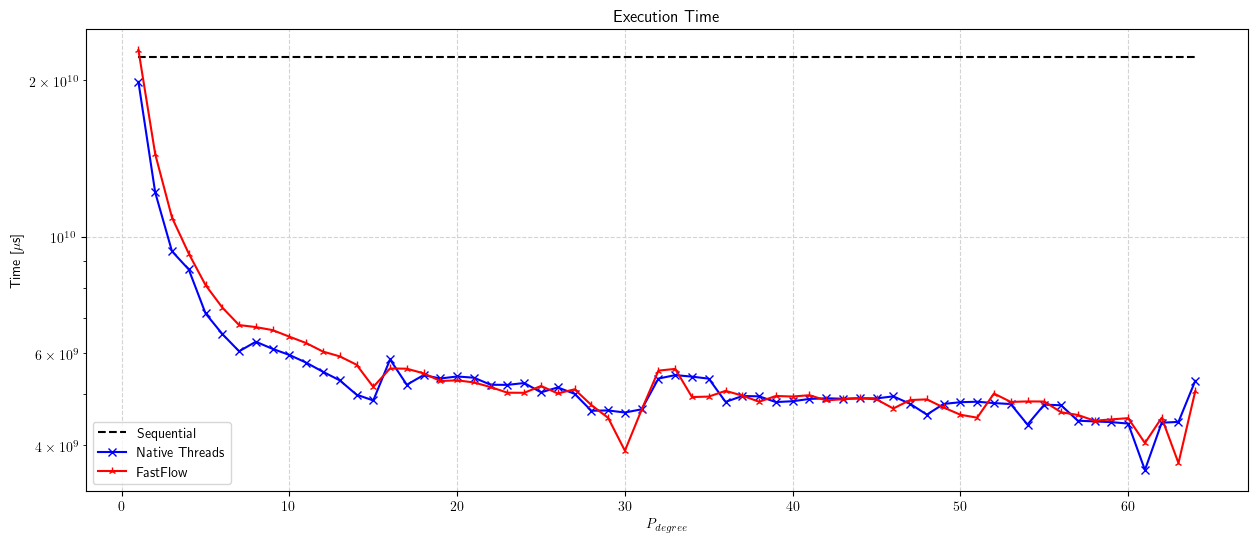

In [7]:
plt.figure(figsize=(15,6))
plt.title("Execution Time")

plt.ylabel("Time [$\mu$s]")
plt.xlabel("$P_{degree}$")
plt.yscale('log')

#plt.xticks([p _])

X = THR_DATA['P_DEGREE']

# Plot sequential implementation
plt.plot(X, [SEQ_DATA['TOTAL'] for _ in X], '--k', label='Sequential')

# Plot THR implementation
plt.plot(X, THR_DATA['TOTAL'], 'x-b', label='Native Threads')

# Plot FF implementation
plt.plot(X, FF_DATA['TOTAL'], '2-r', label='FastFlow')
plt.grid(visible=True, color='lightgray', ls='--')
plt.legend()


## Speedup with I/O

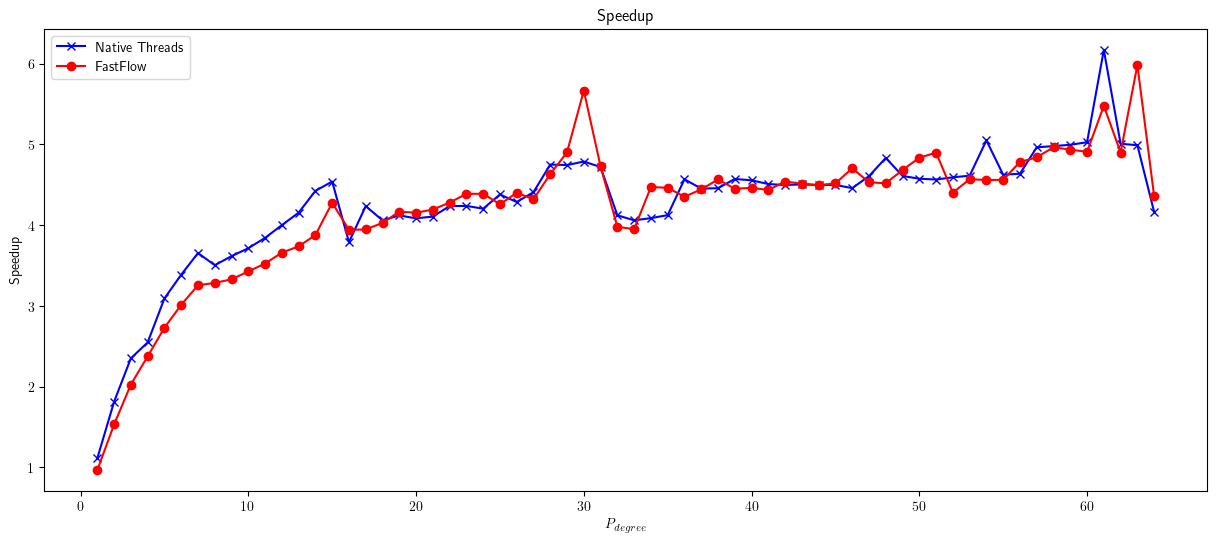

In [8]:
plt.figure(figsize=(15,6))
plt.title("Speedup")

plt.xlabel("$P_{degree}$")
plt.ylabel("Speedup")

# Plot THR
plt.plot(X, THR_DATA['SP_IO'], 'x-b', label="Native Threads")

# Plot FF
plt.plot(X, FF_DATA['SP_IO'], 'o-r', label="FastFlow")

plt.legend()

## Speedup without I/O

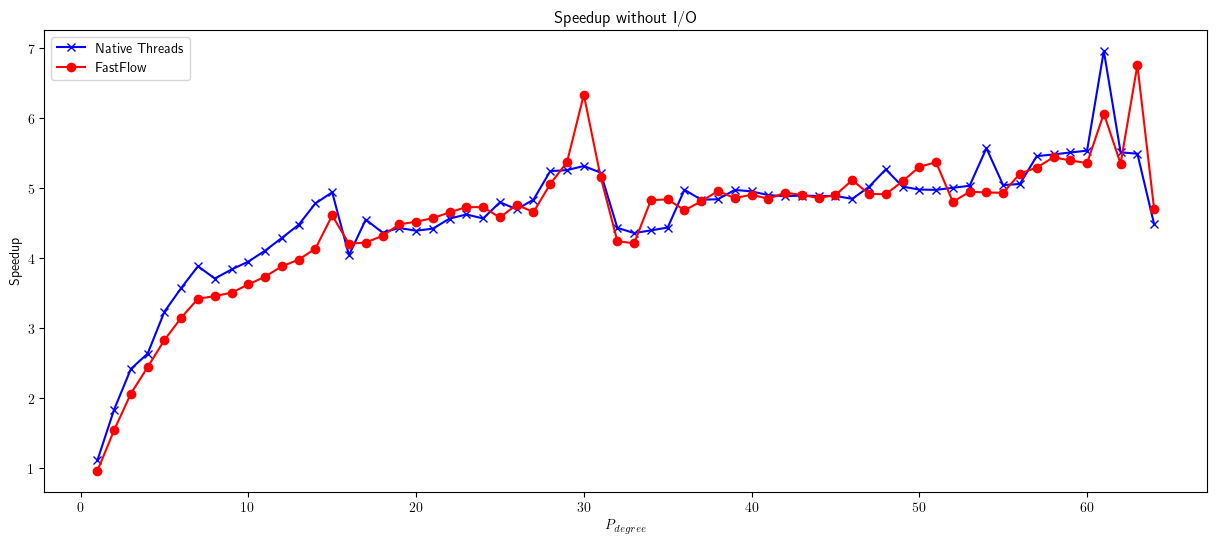

In [9]:
plt.figure(figsize=(15,6))
plt.title("Speedup without I/O")

plt.xlabel("$P_{degree}$")
plt.ylabel("Speedup")

# Plot THR
plt.plot(X, THR_DATA['SP_-IO'], 'x-b', label="Native Threads")
# Plot FastFlow
plt.plot(X, FF_DATA['SP_-IO'], 'o-r', label="FastFlow")

plt.legend()


## Scalability

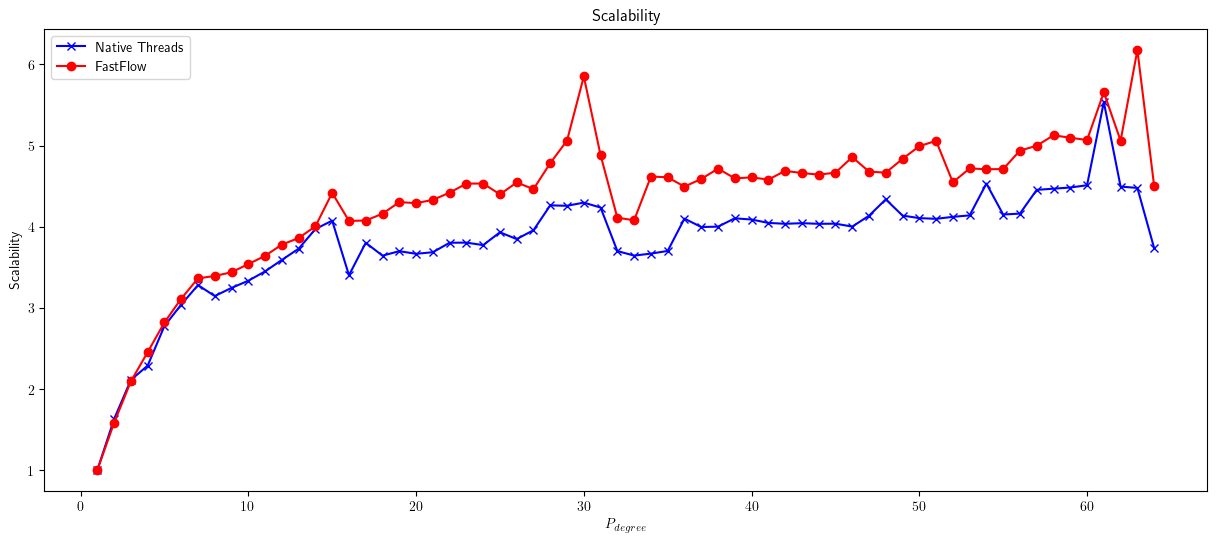

In [10]:
plt.figure(figsize=(15,6))
plt.title("Scalability")
plt.xlabel("$P_{degree}$")
plt.ylabel("Scalability")

# Plot THR
plt.plot(X, THR_DATA['SC_IO'], 'x-b', label="Native Threads")
# Plot FF
plt.plot(X, FF_DATA['SC_IO'], 'o-r', label="FastFlow")
plt.legend()

# Scalability without I/O

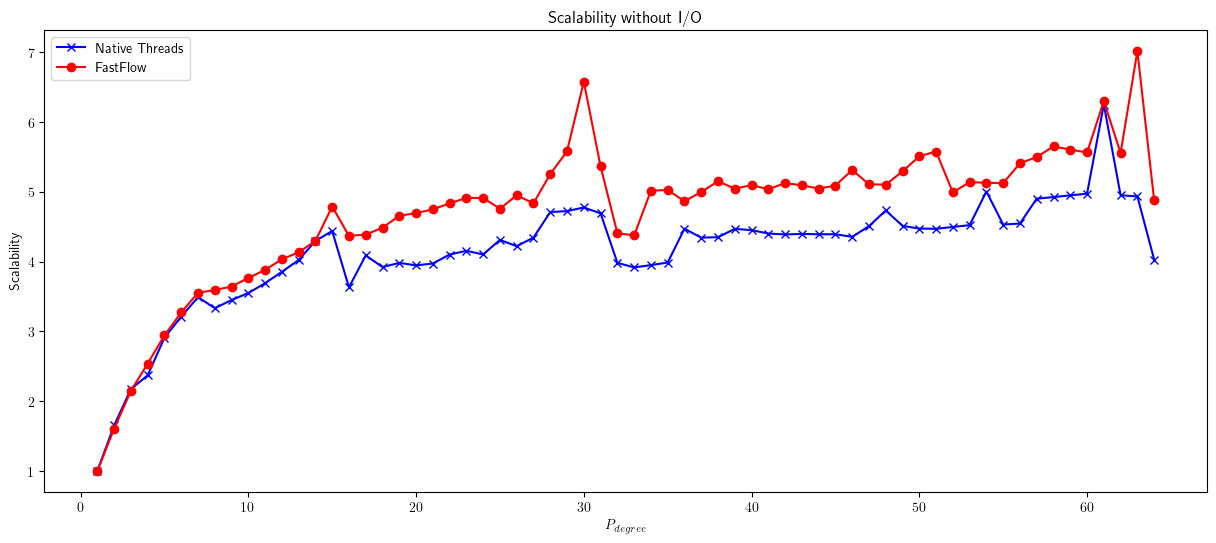

In [11]:
plt.figure(figsize=(15,6))
plt.title("Scalability without I/O")
plt.xlabel("$P_{degree}$")
plt.ylabel("Scalability")

# Plot THR
plt.plot(X, THR_DATA['SC_-IO'], 'x-b', label="Native Threads")
# Plot FF
plt.plot(X, FF_DATA['SC_-IO'], 'o-r', label="FastFlow")

plt.legend()

## Efficiency

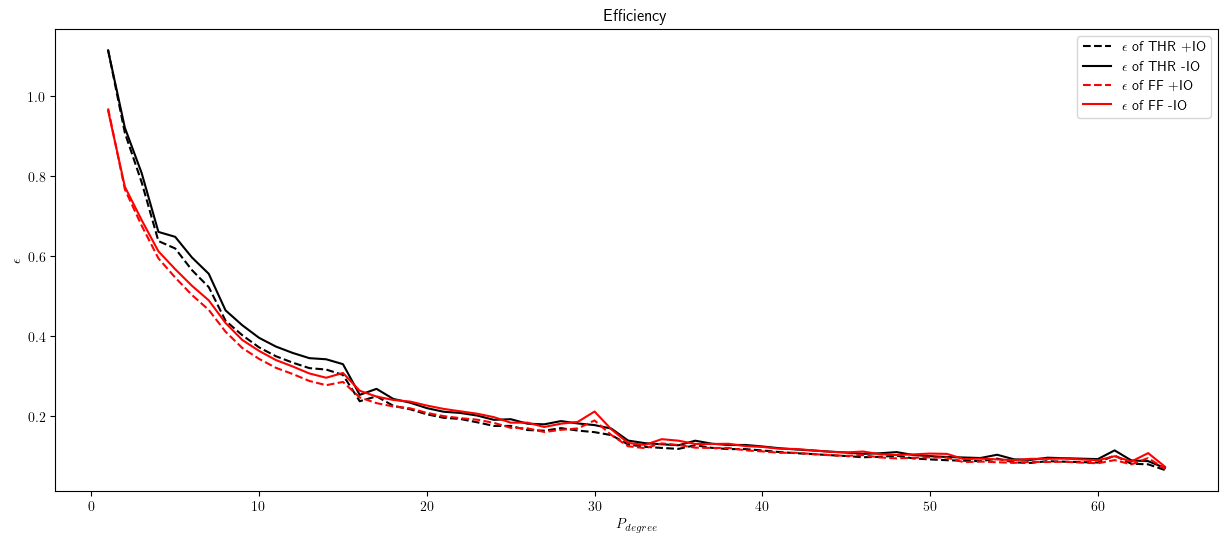

In [12]:
plt.figure(figsize=(15,6))
plt.title("Efficiency")
plt.xlabel("$P_{degree}$")
plt.ylabel("$\epsilon$")

# Plot THR
plt.plot(X, THR_DATA['EFF_IO'], '--k', label="$\epsilon$ of THR +IO")
plt.plot(X, THR_DATA['EFF_-IO'], 'k', label="$\epsilon$ of THR -IO")

# Plot FF
plt.plot(X, FF_DATA['EFF_IO'], '--r', label="$\epsilon$ of FF +IO")
plt.plot(X, FF_DATA['EFF_-IO'], 'r', label="$\epsilon$ of FF -IO")
plt.legend()